## TP 2 : Traffic flow 

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

$\underline{\text{Objectif :}}$ réussir à modéliser et à décrire le système qu'est le flux de la circulation sur une route à une seule voie.

Pour se faire, nous nous plaçerons ici dans le cas d'un trafic instable pour lequel nous pouvons utiliser l'équation de convection non-linéaire de la densité de voiture. En outre, nous procèderons à 2 simulations distinctes afin de mieux comprendre l'évolution de notre système sous différente conditions initiales (CI) et limites (CL) pour la densité de trafic. Nous aurons ainsi les deux ensembles de conditions suivant :

Première simulation :

$$
\left.
    \begin{array}{ll}
         & x = numpy.linspace(0,L,nx)\\
         & \rho_0  = numpy.ones(nx).10\\
         & \rho_0[10:20]  = 50\\
    \end{array}
\right \} \text{  (CI) }
$$


$$
\left.
    \begin{array}{ll}
         & \rho(0,t) = 10
    \end{array}
\right \} \text{  (CL)}
$$

Seconde simulation :

$$
\left.
    \begin{array}{ll}
         & x = numpy.linspace(0,L,nx)\\
         & \rho_0  = numpy.ones(nx).20\\
         & \rho_0[10:20]  = 50\\
    \end{array}
\right \} \text{  (CI) }
$$


$$
\left.
    \begin{array}{ll}
         & \rho(0,t) = 20
    \end{array}
\right \} \text{  (CL)}
$$

Commençons sans plus tarder par le traitement de nos équations.

##### 1. Réécriture de l'équation de convection non-linéaire de la densité de voiture & discrétisations. 
---

#### 1.1 Un bref rappel théorique.

---

Dans la partie théorique de l'énoncé de ce travail, nous avons vu que le flux, instable, de trafic peut-être modélisé comme la convection non-linéaire de la densité de voiture. Il en découllait donc pour notre problème:

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0\\
\end{align}


où

\begin{align}
F = V(\rho) \rho = V_{max} \rho \left( 1- \frac{\rho}{\rho_{max}} \right)
\end{align}

Avec,

$$
\left\{
    \begin{array}{ll}
        &.V  \text{, la vitesse de circulation (en km/h)} \\
        &.V_{max}  \text{, vitesse maximale que peuvent atteindre les}\\
        &\hspace{0.9cm}  \text{voitures lorsque $\rho→0$}\\
        &.\rho \text{, la densité de trafic, c'est à dire le nombre de voiture}\\
        &\hspace{0.9cm}  \text{par unité de longueur (en voitures/km)}\\
        &. \rho_{max},  \text{la densité maximale atteinte lorsque les voitures}\\
        &\hspace{0.9cm}  \text{sont "pare-chocs contre pare-chocs", et à laquelle}\\
        &\hspace{0.9cm}  \text{correspond une vitesse nulle}
    \end{array}
\right.
$$

En appliquant la $règle\ de\ la\ chaîne^{1}$ sur l'équation (1), nous obtenons alors: 

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0\\
\end{align}


Nous allons maintenant passé à la discrétisation (afin de pouvoir résoudre numériquement notre problème) de nos équations. En effet, nous n'allons pas uniquement discrétiser l'équation (3) mais nous allons également discrétiser l'équation (1) et ce dans le but de comparer les résultats obtenus par ces deux discrétisations distinctes et d'en tirer d'éventuelles conclusions.

---
###### [1]. La règle de dérivation des fonctions composées ou "règle de la chaîne" s'énonce comme suit : Soit f une fonction dérivable en a et g dérivable en f(a). Alors la composition g o f est dérivable en a et on a : $(g◦f)'(a) = g'(f(a)) f'(a)$ ou dans la notation de Leibniz si $y=f(x)$ et $u=g(y)$ alors : $\frac{du}{dx}=\frac{du}{dy} \frac{dy}{dx}$


#### 1.2 Discrétisations. 

---

* Discrétisation de l'équation  $
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0$ :

---
Pour se faire, nous calculons tout d'abord la dérivée $\frac{\partial F}{\partial \rho}$. Nous pourrions calculer cette dérivée à la main mais nous nous proposons d'utiliser ce que nous avons appris au cours du dernier notebook de la série *Space and Time — Introduction to Finite-difference solutions of PDEs*, e.g. l'emplois de l'une des fonctionnalités proposées par $sympy^{2}$ : le calcul d'une dérivée partielle. 

---
###### [2] . Sympy est une librairie pour python qui propose de nombreuse fonctionnalités similaires à celle proposée par Mathematica tel que le calcul de dérivée, d'integrale, etc.

Commençons donc par importer la librairie sympy.

In [1]:
# Import de la libraire.
import sympy

# Permet le renvois des résultats dans le style "LaTeX".
from sympy import init_printing
init_printing()

Définissons à présent nos variables, l'expression de F (donnée par l'équation (2) ) et calculons enfin sa dérivée par rapport à $\rho$.

In [2]:
# On définit nos variables.
v_max, rho, rho_max = sympy.symbols('v_max, rho, rho_max')

# Expression de F.
F = v_max*rho*(-(rho/rho_max)+1)

# Calcul de la dérivée.
Fprime = F.diff(rho)

# Affichage du résultat.
Fprime

Ce qui est le même résultat que celui obtenu à la main si nous réexprimons ceci en mettant $v_{max}$ en évidence et en simplifiant quelque peu l'expression:


$\hspace{2.5cm}\frac{- \rho v_{max}}{\rho_{max}}+ v_{max} \left( - \frac{\rho}{\rho_{max}}+1 \right)$ → $v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right)$

Ainsi, nous avons obtenu grâce à sympy :

\begin{equation}
\frac{\partial F}{\partial \rho} = v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right) 
\end{equation}

Et l'équation (1) devient alors :

\begin{equation}
\frac{\partial \rho}{\partial t} + v_{max} \left( 1- \frac{2 \rho}{\rho_{max}} \right)  \frac{\partial \rho}{\partial x} = 0\\
\end{equation}

Nous pouvons à présent passer à la discrétisation de notre équation de convection. Pour se faire, nous utilisons comme demandé dans l'énoncé de ce travail personnel, la *forward-difference* pour la dérivée par rapport au temps et la *backward-difference* pour la dérivée par rapport à l'espace (ici, par rapport à x comme nous travaillons avec une équation à 1 dimension).

Pour rappel, les discrétisations *forward-difference* et *backward-difference* de la dérivée partielle $\frac{\partial u}{\partial x}$ (par exemple) sont données par :

* Forward-difference: si on utilise les points $x_i$ et $x_i + \Delta x$ alors la dérivée devient : $\frac{\partial u}{\partial x} \approx \frac{u(x_{i+1})-u(x_i)}{\Delta x}$.
* Backward-difference: si on utilise les points $x_i$ et $x_i- \Delta x$ alors la dérivée devient : $\frac{\partial u}{\partial x} \approx \frac{u(x_i)-u(x_{i-1})}{\Delta x}$.

Donc en appliquant ces deux discrétisations à l'équation (5) il en découle l'équation suivante:

\begin{equation}\frac{\rho_i^{n+1}-\rho_i^n}{\Delta t} + v_{max} \left( 1- \frac{2 \rho_i^{n}}{\rho_{max}} \right) \frac{\rho_i^n - \rho_{i-1}^n}{\Delta x} = 0, \end{equation}

Où la seule inconnue est $\rho_i^{n+1}$ étant donné nos conditions initiales. En isolant cette inconnue nous obtenons :

\begin{equation}
\rho_{i}^{n+1}= \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left( 1- \frac{2 \rho_{i}^{n}}{\rho_{max}} \right) \left( \rho_{i}^n - \rho_{i-1}^n \right)
\end{equation}

Que nous pouvons maintenant traiter numériquement.

---
* Discrétisation de l'équation $\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0 $:

---

Procédons maintenant à la discrétisation de cette seconde équation. À nouveau, nous utilisons les deux discrétisations demandées (forward & backward). Nous obtenons ainsi :

$$
\left\{
    \begin{array}{}
        \frac{\partial F}{\partial x}  \approx \frac{F_{i}^{n}-F_{i-1}^{n}}{\Delta x}\\
        \frac{\partial \rho}{\partial t}  \approx \frac{\rho_{i}^{n+1}-\rho_{i}^{n}}{\Delta x}
    \end{array}{}
\right.
$$

où
$$
\left\{
    \begin{array}{}
        F_{i}^{n} & = v_{max} \rho_{i}^{n} \left( 1- \frac{\rho_{i}^{n}}{\rho_{max}} \right)\\
        F_{i-1}^{n} & = v_{max} \rho_{i-1}^{n} \left( 1- \frac{\rho_{i-1}^{n}}{\rho_{max}} \right)
    \end{array}{}
\right.
$$

Ainsi si on réintroduit ceci dans l'équation (3) et qu'on isole la seule inconnue $\rho_i^{n+1}$, nous obtenons alors l'équation discrétisée :

\begin{equation}
\rho_{i}^{n+1}= \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left[\rho_{i}^{n} \left( 1- \frac{ \rho_{i}^{n}}{\rho_{max}} \right) - \rho_{i-1}^n\left( 1 - \frac{ \rho_{i-1}^{n}}{\rho_{max}} \right) \right]
\end{equation}

---
##### 2. Résolution du problème suivant la discrétisation de l'équation (1).

---

#### PARTIE A .
---

Comme à notre habitude, nous commençons par importer les librairies "numpy", matplotlib et JSAnimation. Cette dernière sera utile pour "animer nos graphes".

In [3]:
import numpy
from matplotlib import pyplot, animation, rcParams
%matplotlib inline
from IPython.display import HTML
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous déclarons ensuite nos données pour cette première partie à savoir la vitesse maximale du trafic,la longueur de la route,...

In [4]:
# Déclaration des variables:

v_max = 80       # en km/h
L     = 11       # en km
rho_max = 250    # en voitures/km
nx    = 51       # nombre de point de la grille des positions
dx    = L/(nx-1) # intervalle entre chaque point de la grille
dt    = 0.001    # h

Et nos conditions initiales, e.g. une densité de voiture décrite de la manière suivante:

In [5]:
# Conditions initiales pour la densité de trafic:

x = numpy.linspace(0,L,nx)
rho0A = numpy.ones(nx)*10
rho0A[10:20] = 50

Vérifions à présent que nos conditions initiales ont correctement été initialisées en réalisant le graphique de la densité en fonction de la position.

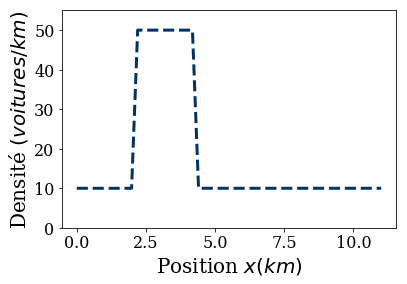

In [6]:
pyplot.ylabel('Densité'' ''$(voitures/km)$', fontsize=20) # nom de l'axe x & taille de la police
pyplot.xlabel('Position'' ''$x(km)$', fontsize=20) # nom de l'axe y & taille de la police
pyplot.plot(x, rho0A, color='#003366', ls='--', lw=3)
pyplot.tick_params(axis='both',labelsize=16)
pyplot.ylim(0,55);

Comme attendus, la densité de voiture au temps t = 0s est bien fixé à :

$$
→ \left\{ 
\begin{aligned} 
& \mbox{50  voitures/km $si^{(1)}$ x} \in \mbox{ [ } 2.2,4.4 ]km \\
& \mbox{10 voitures/km partout ailleurs}
\end{aligned}
\right.
$$


Nos conditions intiales étant fixées, nous pouvons commencer à répondre aux questions qui nous ont été posées.

---
###### (1) En effet, puisque $nx = 51 → dx = 0.22$. Par conséquent $[10,20] → [2.2,4.4] $km

---

Avant de passer à la résolution, commençons par définir une fonction pour la vitesse du trafic qui reprend simplement l'expression de l'équation (2) (que l'on a divisé par $\rho$ pour n'obtenir que l'expression recherchée de la vitesse). Cette fonction nous permettra de ressortir la vitesse du trafic pour un temps donné compte tenu de la densité à ce même moment.

In [7]:
def v(rho):
    return v_max*(1-(rho/rho_max))

Définissons maintenant une seconde fonction qui s'avérera utile pour toute la suite.

* Motivation de l'introduction de cette nouvelle fonction:

Après une première écriture et résolution de l'ensemble des problèmes posés, nous nous sommes rendu compte que ces résolutions pouvaient & faisaient appels aux mêmes algorithmes aux paramètres et variables prêt. L'écriture d'une fonction regroupant ces derniers nous a alors parrue être une manière élégante de procédé.

* Rôle & explication de cette nouvelle fonction, la fonction "$evo()$":

Cette fonction s'articule en plusieurs parties.

→ Dans la première partie nous posons simplement l'ensembles de nos paramètres et variables qui resteront fixe tout au long de la résolution du problème (aussi bien pour la partie A que pour la partie B).

→ Dans la seconde partie nous posons nos conditions initiale où nous voyons apparaître la variable "CL" qui n'est autre que la condition limite variant d'une partie à l'autre et que nous devrons fournir avant l'appel de notre fonction.

→ La partie suivante est le coeur même de notre fonction. Nous commençons par définir un tableau de dimension $(nt$ x $nx)$ que nous pouvons voir comme une matrice A où chaque coefficient $a_{ij}$ est lui même une matrice. Donc dans notre cas, A correspond à un "tableau de tableau de densité" pour tout temps tandis que chacun des $a_{ij}$ correspond à un unique tableau de densité (pour un nt donné).

Une fois ce tableau définit nous lançons alors une boucle for pour les nt. Cette boucle va donc passer de tableau en tableau donc de $a_{nx,1} → a_{nx,2} → ... → a_{nx,nt}$. Ainsi, a chaque pas, la boucle va calculer pour toute les positions la densité correspondante étant donné l'équation discrétisée utilisée. Dès lors, en utilisant l'indexation vu dans le notebook "02-01-1DConvection", nous n'avons ainsi besoin que d'une seule boucle for pour faire ce que nous venons de décrire.

→ Finalement, la dernière partie est celle où figurent les calculs des vitesses recherchées (minimale & moyenne), pour un instant donné.

* vitesse minimale initiale : nous utilisons notre fonction $v(rho)$ pour calculer la vitesse correspondant à chaque densité et ce pour l'instant initial ($t = 0$). La fonction $min()$ fournit par numpy nous permet alors d'obtenir la vitesse minimale.
* Vitesse moyenne : celle-ci sera obtenue en faisant à nouveau appel à la fonction $v(rho)$ qui prend la moyenne des densités (de par la fonction $mean()$ fournie par numpy) de la dernière étape de calcul pour un temps de simulation donné.
* Vitesse minimale finale : Cette dernière est obtenue de manière similaire à la vitesse minimale initiale à la différence que l'on prend les densités pour la dernière étape de calcul.

Remarque : les valeurs calculées à chaque appel de la fonction sont stockées dans un tableau afin de pouvoir être récupérée en temps voulu.

In [8]:
def evo(CL,t_sim,v_max,v):


    # On pose l'ensemble des paramètres qui reste fixes d'une simulation à une autre
    dt=0.001 
    nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation
    L=11                      # en km
    rho_max=250               # en voitures/km
    nx=51                     # Nombre de point de la grille d'espace
    dx=L/(nx-1)

    #On pose nos conditions intiales 
    x = numpy.linspace(0,L,nx)
    rho0 = numpy.ones(nx)*CL
    rho0[10:20] = 50
    
    # Définition de notre matrice densité pour tout temps et toute position
    rho=numpy.empty((nt,nx))
    rho[0]=rho0    # Notre première matrice densité est celle correspondant à nos conditions initiales.

    #On calcul notre densité inconnue pour tout temps
    for n in range(0, nt-1):  
        rho[n+1][1:] = rho[n][1:]- dt/dx* v_max *(1-2*rho[n][1:]/rho_max)*(rho[n][1:]-rho[n][0:-1])
        rho[n+1][0]=CL   # Notre condition au bord

    #Réalise un graphe des densités finales en fonction de la position
    pyplot.ylabel('Densité'' ''$(voitures/km)$', fontsize=20) # nom de l'axe x & taille de la police
    pyplot.xlabel('Position'' ''$x(km)$', fontsize=20) # nom de l'axe y & taille de la police
    pyplot.plot(x, rho[nt-1], color='#003366', ls='--', lw=3)
    pyplot.tick_params(axis='both',labelsize=16)
    pyplot.ylim(0,55);
    
    
    #Calcul des valeurs recherché et stockage de celles-ci  
    vminI = min(v(rho[0,:]))
    vmoyF = v(numpy.mean(rho[nt-1]))
    vminF = min(v(rho[nt-1,:]))
    
    
    u[0]=vminI
    u[1]=vminF
    u[2]=vmoyF

Passons enfin aux questions et à leur résolution.

Remarques préliminaires: 

* Pour obtenir les résultats recherchés dans les bonnes unités nous procédons à une simple convertion de nos résultats. Ceci explique la présence du facteur multiplicatif " 10/36 " ci-dessous.

* Chacun des résultats affichés l'est avec deux décimales uniquement et ceci grâce à la fonction $round()$ proposée par numpy.

---
1) Quelle est la vitesse minimale au temps t = 0 s en m/s (arrondir à 2 décimales).

---

Pour répondre à cette première question, nous faisons simplement appel à la fonction $evo()$ étant donné la condition limite, le temps de la simulation et la vitesse maximale

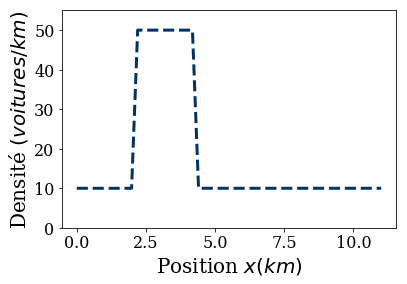

In [9]:
t_sim = 0      # le temps de la simulation en min
CL    = 10     # conditon limite en voiture/km
v_max = 80     # vitesse maximale en km/h
u=numpy.empty(3)  #On définit notre tableau de solution (de vitesses)

# On appel notre fonction evo
evo(CL,t_sim,v_max,v)

In [10]:
# On ressort alors le résultat recherché
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(u[0]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 0s : v = 17.78 m/s


---
2) Quelle est la vitesse moyenne au temps t = 3 min en m/s (arrondir à 2 décimales).

---

Pour répondre à cette 2e question, il nous faut spécifier un temps de simulation (de 3 min pour cette première partie). Quant à la vitesse maximale et à la condition limite, celles-ci ne changeant pas et restant en mémoire, il est inutile de les redéfinir.  

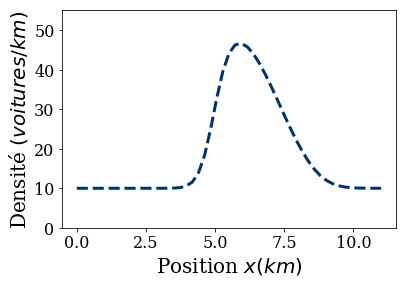

In [11]:
t_sim = 3   # En min

evo(CL,t_sim,v_max,v)

In [12]:
print ("→ Vitesse moyenne du trafic à l'instant t = 3 min : v =",round(u[2]*10/36,2),"m/s")

→ Vitesse moyenne du trafic à l'instant t = 3 min : v = 20.56 m/s


En esquissant le graphe de la densité en fonction de la distance, nous observons que le signal carré de départ est devenu un signal plus courbé.

Ceci nous semble physiquement cohérent si nous considérons le temps de réaction d'un chauffeur qui n'est pas instantanné. Par conséquent, un phénomène de propagation de l'action "démarrage" ou "freinage" se manifeste ce qui se traduit sur notre graphique par une courbure du signal carré.

---
3) Quelle est la vitesse minimale au temps t = 6 min en m/s (arrondir à 2 décimales).

---

Pour cette dernière question de la première partie nous fixons le temps de la simulation à 6 min comme demandé et nous ne redéfinissons aucune autre variables pour les raisons évoquées à la question 2). Nous refaisons alors appel à notre fonction et nous ressortons la valeur recherchée.

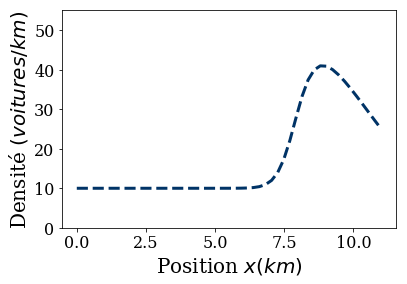

In [13]:
t_sim = 6    # En min

evo(CL,t_sim,v_max,v)

In [14]:
print ("→ Vitesse minimale du trafic à l'instant t = 6 min : v =",round(u[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 6 min : v = 18.58 m/s


Comme pour la question précédente, nous observons le même type de comportement à la différence que notre système a put évoluer sur un temps plus long.

---

#### PARTIE B.
---

Pour cette seconde partie nous allons procéder de manière identique à la première en veillant à procéder aux bons changement de paramètres et variables.

Nous commençons donc par déclarer nos nouvelles variables et conditions initiales & limites.

In [15]:
# Déclaration des variables

v_max = 136     # en km/h
L     = 11      # en km
rho_max = 250   # en voitures/km
nx    = 51      # Nombre de point de la grille des positions
CL    = 20      # Nouvelle condition limite
v_max = 136     # Nouvelle vitesse maximale

# Nouvelle condition initiale
x = numpy.linspace(0,L,nx)
rho0B = numpy.ones(nx)*20 
rho0B[10:20] = 50

On vérifie grâce à un nouveau graphique de la densité que nos nouvelles conditions ont correctements été initialisées.

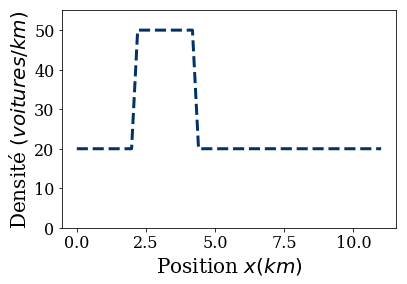

In [16]:
pyplot.ylabel('Densité'' ''$(voitures/km)$', fontsize=20) # nom de l'axe x & taille de la police
pyplot.xlabel('Position'' ''$x(km)$', fontsize=20) # nom de l'axe y & taille de la police
pyplot.plot(x, rho0B, color='#003366', ls='--', lw=3)
pyplot.tick_params(axis='both',labelsize=16)
pyplot.ylim(0,55);

Comme attendus, la densité de voiture au temps $t = 0s$ est bien fixé à :

$$
→ \left\{ 
\begin{aligned} 
& \mbox{50  voitures/km si x} \in \mbox{ [ } 2.2,4.4 ]km \\
& \mbox{20 voitures/km partout ailleurs}
\end{aligned}
\right.
$$


Nos nouvelles conditions intiales étant fixées, nous pouvons commencer à répondre aux questions suivantes.

---
4) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

On se sert comme annoncé de notre fonction $evo()$ comme précédemment et on définit un temps de simulation de $t = 0s$. Aucune autre variable ne doit-être définie étant donné qu'elles l'ont été durant la partie qui précède cette question.

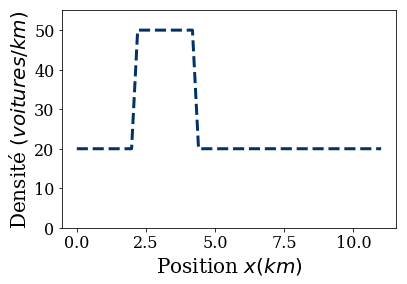

In [17]:
t_sim = 0    # En min

evo(CL,t_sim,v_max,v)

In [18]:
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(u[0]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 0s : v = 30.22 m/s


---
5) Quelle est la vitesse moyenne au temps t = 3 min en m/s (arrondir à 2 décimales).

---

On change le temps de simulation et on rappel la fonction $evo()$.

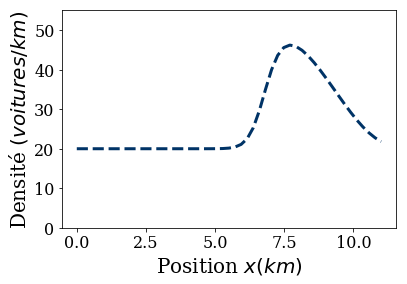

In [19]:
t_sim = 3    # En min

evo(CL,t_sim,v_max,v)

In [20]:
print ("→ Vitesse moyenne du trafic à l'instant t = 3 min : v =",round(u[2]*10/36,2),"m/s")

→ Vitesse moyenne du trafic à l'instant t = 3 min : v = 33.77 m/s


Nous observons le même type de résultat que celui obtenu dans la partie A à la différence que la "vague" à un peu plus progressée (pour un même temps de simulation) étant donné la vitesse maximale plus élevée dans cette seconde partie.

---
6) Quelle est la vitesse minimale au temps t = 3 min en m/s (arrondir à 2 décimales).

---

Pour cette dernière question, aucune des variables ne changent. Il suffit dès lors de sortir la valeur déjà calculée par notre fonction lors de son dernier appel à la question 5).

In [21]:
print ("→ Vitesse minimale du trafic à l'instant t = 3 min : v =",round(u[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 3 min : v = 30.79 m/s


---
##### 3. Résolution du problème suivant la discrétisation de l'équation (3).

---

Pour cette deuxième approche du problème utilisant une discrétisation différente de la première nous allons comme annoncé en début de ce notebook utilisé la discrétisation de l'équation (3).

Ceci implique une petite modification dans notre fonction $evo()$ à savoir la ligne de code dans la boucle for qui rend compte de notre discrétisation. En respectant ainsi la discrétisation nous avons alors la nouvelle fonction $evo2()$ suivante :

In [22]:
def evo2(CL,t_sim,v_max,v):

    """
    
    
    
    """
    # On pose l'ensemble des paramètres qui reste fixes d'une simulation à une autre
    dt=0.001 
    nt=int(t_sim/(dt*60))+1   # Nombre de point requis dans la grille pour la simulation
    L=11                      # en km
    rho_max=250               # en voitures/km
    nx=51                     # Nombre de point de la grille d'espace
    dx=L/(nx-1)

    #On pose nos conditions intiales 
    x = numpy.linspace(0,L,nx)
    rho0 = numpy.ones(nx)*CL
    rho0[10:20] = 50
    
    # Définition de notre matrice densité pour tout temps et toute position
    
    rho=numpy.empty((nt,nx))
    rho[0]=rho0         

    #On calcul notre densité inconnue pour tout temps
    for n in range(0, nt-1):  
        rho[n+1][1:] = rho[n][1:]-((dt/dx)*v_max*((rho[n][1:]*(1-(rho[n][1:]/rho_max)))-(rho[n][0:-1]*(1 - (rho[n][0:-1]/rho_max)))))
        rho[n+1][0]=CL   # Notre condition au bord

    #Réalise un graphe des densités finales en fonction de la position
    pyplot.ylabel('Densité'' ''$(voitures/km)$', fontsize=20) # nom de l'axe x & taille de la police
    pyplot.xlabel('Position'' ''$x(km)$', fontsize=20) # nom de l'axe y & taille de la police
    pyplot.plot(x, rho[nt-1], color='#003366', ls='--', lw=3)
    pyplot.tick_params(axis='both',labelsize=16)
    pyplot.ylim(0,55);
    
    #Calcul des valeurs recherché et stockage de celles-ci    
    vmoyF = v(numpy.mean(rho[nt-1]))
    vminI = min(v(rho[0,:]))
    vminF = min(v(rho[nt-1,:]))
    
    
    w[0]=vminI
    w[1]=vminF
    w[2]=vmoyF

Ensuite, afin de ne pas surcharger ce notebook et d'éviter de laçer le lecteur, nous nous permettons ici de donner les résultats d'une même partie les uns à la suite des autres, les justifications et l'emplois de chaque algorithme étant identique a ce qui a été fait dans la partie consacrée à la première discrétisation.

#### PARTIE A .
---

→ Déclaration des nouvelles variables.

In [23]:
# Déclaration des variables

v_max = 80       # en km/h
CL    = 10       # Condition limite en voiture/km

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)

---
1) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

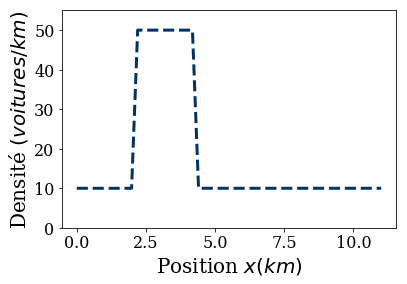

In [24]:
t_sim = 0    # En min

evo2(CL,t_sim,v_max,v)

In [25]:
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(w[0]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 0s : v = 17.78 m/s


---
2) Quelle est la vitesse moyenne au temps t = 3 min en m/s (arrondir à 2 décimales).

---

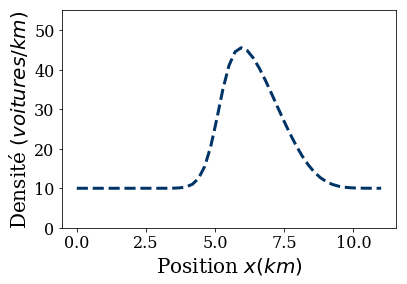

In [26]:
t_sim = 3    # En min

evo2(CL,t_sim,v_max,v)

In [27]:
print ("→ Vitesse moyenne du trafic à l'instant t = 3 min : v =",round(w[2]*10/36,2),"m/s")

→ Vitesse moyenne du trafic à l'instant t = 3 min : v = 20.64 m/s


---
3) Quelle est la vitesse minimale au temps t = 6 min en m/s (arrondir à 2 décimales).

---

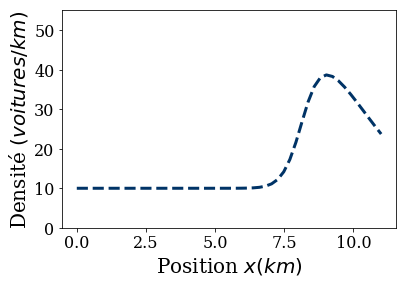

In [28]:
t_sim = 6    # En min

evo2(CL,t_sim,v_max,v)

In [29]:
print ("→ Vitesse minimale du trafic à l'instant t = 6 min : v =",round(w[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 6 min : v = 18.78 m/s


---

#### Partie B
---

Les conditions pour cette ultime partie sont données par:

In [30]:
# Déclaration des variables
v_max = 136      # en km/h
CL    = 20      # Condition limite en voiture/km

---
4) Quelle est la vitesse minimale au temps t = 0s en m/s (arrondir à 2 décimales).

---

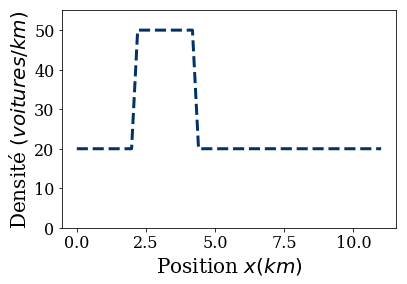

In [31]:
t_sim = 0    # En min

evo2(CL,t_sim,v_max,v)

In [32]:
print ("→ Vitesse minimale du trafic à l'instant t = 0s : v =",round(w[0]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 0s : v = 30.22 m/s


---
5) Quelle est la vitesse moyenne au temps t = 3 min en m/s (arrondir à 2 décimales).

---

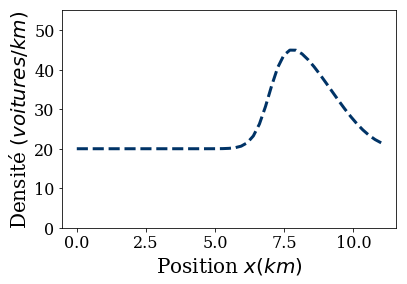

In [33]:
t_sim = 3    # En min

evo2(CL,t_sim,v_max,v)

In [34]:
print ("→ Vitesse moyenne du trafic à l'instant t = 3 min : v =",round(w[2]*10/36,2),"m/s")

→ Vitesse moyenne du trafic à l'instant t = 3 min : v = 33.87 m/s


---
6) Quelle est la vitesse minimale au temps t = 3 min en m/s (arrondir à 2 décimales).

---

In [35]:
print ("→ Vitesse minimale du trafic à l'instant t = 3 min : v =",round(w[1]*10/36,2),"m/s")

→ Vitesse minimale du trafic à l'instant t = 3 min : v = 30.99 m/s


---

##### 4. Animations :

---

Pour bien se rendre compte de ce qui s'est passé dans les questions précédentes et afin de bien visualiser la situation, nous pouvons réaliser une animation de l'ensemble des graphes (correspondant chacun à un certain point de la grille de temps) générés pour un temps et une discrétisation donnée. Ceci nous permettra de visualiser l'évolution de la densité en chaque position au cours du temps en plus d'être un bon exercice pour réaliser des animations.

Pour se faire nous choisissons de créer deux animations pour la discrétisation de l'équation : $\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0 $. Une première pour la partie A et une seconde pour la partie B.

Créons maintenant les animations désirées.

---

#### Simulation Partie A - discrétisation de l'équation (3).
---

Commençons par redéfinir certaine de nos variables.

Remarque préliminaire: Le choix du temps de simulation est arbitraire.

In [36]:
# Déclaration des variables

v_max = 80       # En km/h
CL    = 10       # Condition limite en voiture/km
t_sim = 3        # En min

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)

On définit alors notre graphe animé à partir d'une nouvelle fonction reprenant notre équation discrétisée. Les conditions initiales & aux bords seront préalablement rappelées.

In [37]:
# On définit les axes et autres paramètre de notre animation
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,14), ylim=(0,55))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
pyplot.xlabel('Position en $(km)$\n',fontsize=20)
pyplot.ylabel('Densité en $(voiture/km)$',fontsize=20)
pyplot.tick_params(axis='both',labelsize=16)
pyplot.tight_layout()
pyplot.close()

nt=int(t_sim/(dt*60))+1    # Nombre de point requis dans la grille pour la simulation
x = numpy.linspace(0,L,nx) # On initialise notre liste des positions

# Nos conditions initiales
rho = numpy.ones(nx)*CL
rho[10:20] = 50
rho[0] = CL       # Notre condition au bord
    
# On définit la fonction qui permet de réaliser et de retenir en mémoire tout les grpahe afin de créer une animation
def trafic(i):
    line.set_data(x,rho)
    rhon    = rho.copy()    # Notre première matrice densité est celle correspondant à nos conditions initiales.
    rho[1:] = rhon[1:]-((dt/dx)*v_max*((rhon[1:]*(1-(rhon[1:]/rho_max)))-(rhon[0:-1]*(1 - (rhon[0:-1]/rho_max)))))

# On appel la fonction trafic pour produire l'animation    
anim = animation.FuncAnimation(fig, trafic,frames=nt, interval=50)
HTML(anim.to_html5_video())

Ce résultat nous semble tout a fait cohérent avec ce qui a déjà été dit. Notons que nous analyserons tout de même plus amplement tout ceci dans la section suivante.

---

#### Simulation Partie B - discrétisation de l'équation (3).
---

Nous redéfinissons à nouveau certaine de nos variables et nous créons notre nouvelle animation.

In [38]:
# Déclaration des variables

v_max = 136       # En km/h
CL    = 20       # Condition limite en voiture/km
t_sim = 3        # En min

# Déclaration d'un tableau qui va contenir les vitesses 
w=numpy.empty(3)

In [39]:
# On définit les axes et autres paramètre de notre animation
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,14), ylim=(0,55))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]
pyplot.xlabel('Position en $(km)$',fontsize=20)
pyplot.ylabel('Densité en $(voiture/km)$',fontsize=20)
pyplot.tick_params(axis='both',labelsize=16)
pyplot.tight_layout()
pyplot.close()

nt=int(t_sim/(dt*60))+1    # Nombre de point requis dans la grille pour la simulation
x = numpy.linspace(0,L,nx) # On initialise notre liste des positions

# Nos conditions initiales
rho = numpy.ones(nx)*CL
rho[10:20] = 50
rho[0] = CL       # Notre condition au bord

# On définit la fonction qui permet de réaliser et de retenir en mémoire tout les grpahe afin de créer une animation
def trafic(i):
    line.set_data(x,rho)
    rhon   = rho.copy()    # Notre première matrice densité est celle correspondant à nos conditions initiales.
    rho[1:] = rhon[1:]-((dt/dx)*v_max*((rhon[1:]*(1-(rhon[1:]/rho_max)))-(rhon[0:-1]*(1 - (rhon[0:-1]/rho_max)))))

# On appel la fonction trafic pour produire l'animation      
anim = animation.FuncAnimation(fig, trafic,frames=nt, interval=50)
HTML(anim.to_html5_video())

Ce qui parrait à nouveau physiquement cohérent et correspond à nos attentes. Passons enfin à l'analyse des résultats obtenus.

---

##### 5. Analyse et comparaisons des résultats:
---

#### Synthèse des résultats obtenus.

---

Pour plus de lisibilité nous avons repris dans le tableau ci-dessous l'ensembles des résultats obtenus.


![Image](./figures/tableau_synthese.png)

---
###### figure 1 : Synthèse des résultats obtenues tout au long de la résolution du problème posé.

___

Nous allons tout d'abord comparer les résultats obtenus vis à vis d'une discrétisation ou d'une autre. Nous analyserons ensuite pour une discrétisation donnée, les résultats obtenus pour chacune des deux parties.

---
#### Comparaison des discrétisations.

---

En vérifiant les valeurs obtenues via la discrétisation de l'équation (1) sur le site http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about, nous constatons que les résultats sont valides mais diffèrent quelque peu des vraies valeurs. Si nous vérifions maintenant les résultats obtenus pour la discrétisation de l'équation (3), nous obtenons les résultats "exacts".

La raisons de cette différence de valeur vient directement de l'équation que l'on discrétise. En effet, discrétiser l'éq. (1) ou discrétiser l'éq. (3) et y substituer l'expression de F discrétisé ne revient pas a faire la même chose même si cela semble revenir au même. On peut pour cela s'en rendre compte en observant les deux expressions discrétisées:

$$
\left\{
    \begin{array}{}
        \rho_{i}^{n+1} & = \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left( 1- \frac{2 \rho_{i}^{n}}{\rho_{max}} \right) \left( \rho_{i}^n - \rho_{i-1}^n \right)\\
        \rho_{i}^{n+1} & = \rho_{i}^{n} - v_{max} \frac{\Delta t}{\Delta x} \left[\rho_{i}^{n} \left( 1- \frac{ \rho_{i}^{n}}{\rho_{max}} \right) - \rho_{i-1}^n\left( 1 - \frac{ \rho_{i-1}^{n}}{\rho_{max}} \right) \right]
    \end{array}{}
\right.
$$

Ces deux discrétisations ne vont pas nous données les mêmes valeurs de $\rho_{i}^{n+1}$ et de fait, ne vont pas nous donner les mêmes valeurs recherchées.

En outre, la seconde discrétisation (discrétisation de l'éq. (3)) est celle qui nous fournira les valeurs correctes et ce car il s'agit de la discrétisation d'une équation qui ressemble à une équation de continuité (équation bilan de la masse). Elle rend compte de ce qui se passe physiquement à savoir la conservation de la densité globale e.g. qu'il ne peut pas y avoir création de 0.36 voiture par exemple (ce dont l'éq. (1) ne rend pas compte).

---
#### Analyse des résultats obtenus pour la discrétisation de l'équation (3).

---

→ On constate tout d'abord que le changement des CL (passage de 10 à 20 $voitures/km$) n'a pas d'impact sur l'allure générale de nos graphiques. Il a par contre pour conséquence de diminuer légèrement la vitesse minimale pour un temps donné (non-nul) ainsi que la vitesse moyenne. En effet, si nous effectuons l'exercice de remettre la CL à 10 au lieux de 20 dans la partie B (de la discrétisation de l'éq. (3)) afin de garder la $v_{max}$ constante, nous obtenons une valeur de $v_{moy}(t = 3 min)$ de $35.10$ $m/s$ au lieux de $33.87$ $m/s$. 
Ceci s'explique par le fait qu'augmenter la CL a pour conséquence de "densifier" le système. Par conséquent, le trafic peut évoluer moins rapidemment et donc la vitesse moyenne comme minimale y est moins élevée. C'est précisémment ce qui se passe lors d'un embouteillage.


→ L'augmentation de la vitesse maximale du trafic a quant elle pour conséquence d'augmenter la valeur de l'ensemble des résultats et donc de modifier quelque peu l'allure de nos graphiques. Ceci nous semble tout a fait cohérent car comme nous l'avons expliquer auparavant, une augmentation de la vitesse maximale permet au système d'évoluer plus rapidemment et c'est précisémment ce que l'on observe si l'on compare les graphiques de la partie A et de la partie B pour une même question.
A nouveau, pour bien s'en convaincre nous pouvons effectuer l'exercice de rechanger la valeur de $v_{max}$ pour la seconde discrétisation dans la partie B (et ce afin de garder la CL constante). Nous obtenons ainsi une valeur de $v_{moy}(t = 3 min)$ de $19.92$ $m/s$ ($v_{max}=80 m/s$) au lieu de $33.87$ $m/s$ ($v_{max}=136 m/s$). Nous voyons une augmentation significative de la vitesse moyenne lors de l'augmentation de $v_{max}$, conformément a ce que nous avons expliqué.

---

##### 6. Conclusions:
---


Ce nouveau problème nous à permis de mettre en pratique certaines choses vues au cours des quatres notebook constituant cette nouvelle leçon. Citons notamment l'emplois de double indice (indexation) qui permet d'écrire plus succinctement une boucle for mais aussi la fonctionnalité proposée par sympy, e.g. le calcul sans effort de dérivée partielle. 

Il nous a également permis de vérifier notre bonne compréhension de la discrétisation d'une EDP mais à surtout mis en évidence qu'une discrétisation pouvait différée numériquement d'une autre même si aux premiers abords elles semblent similaires. Une étude plus approfondies nous auraient cependant permis de mieux comprendre les causes de la différence des valeurs obtenues.

En outre nous avons pus modéliser des conditions assez réalistes de trafic et vu l'impact de certain paramètre comme la densité et la vitesse sur ce dernier.

---

##### 7. Sources:
---


[1] Cours de MATH-F-101 (Calcul Différentiel et Intégral 1) présenté par M. Joel Fine et M. Denis Bonheure, professeurs à l'ULB.

[2] Notebook *02.04 - 1D Burgers* de la série *Space and Time — Introduction to Finite-difference solutions of PDEs*

---

###### The cell below loads the style of the notebook.

In [40]:
from IPython.core.display import HTML
css_file = 'styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())